In [1]:
#Importing Libraries
from Plots import *
import matplotlib.pyplot as plt
import time    
from IPython.display import HTML

# Bulb Model - Single Angle

In [2]:
from ODE_Bulb_SingleAngle import *

In [4]:
nu_types=['nu_e','nu_x']
#t_bins=7000
#R_nu=10 #km
r_i,r_f=10,150 #km

E_i,E_f=1,50
E_step=1

#Initial spectrum
E_0=np.array([10,15,24,24]) #Mean energy in MeV
#Luminosity
Lum=np.array([1,1,1,1]) #Luminosity 10⁵¹ ergs/

In [5]:
start_time = time.time()
y0,omega,E_vec,t_vec,mu_0,n_f,n_dim,n_E=initiate(nu_types,r_i,r_f,E_i,E_f,E_step,E_0,Lum)
params=-1*np.array(omega),mu_0,n_f,n_dim,n_E
psoln= odeint(func_Collective_nu, y0, t_vec, args=(params,))
nu, nubar= read_output(psoln,(n_f,n_dim,n_E))
nu_e_time,nubar_e_time,nu_x_time,nubar_x_time=read_two_flavor_v1(nu, nubar)
print("Took %s minutes" % ((time.time() - start_time)/60))

5.247148129197688e-05
1.25e-06
Took 1.8879703203837077 minutes


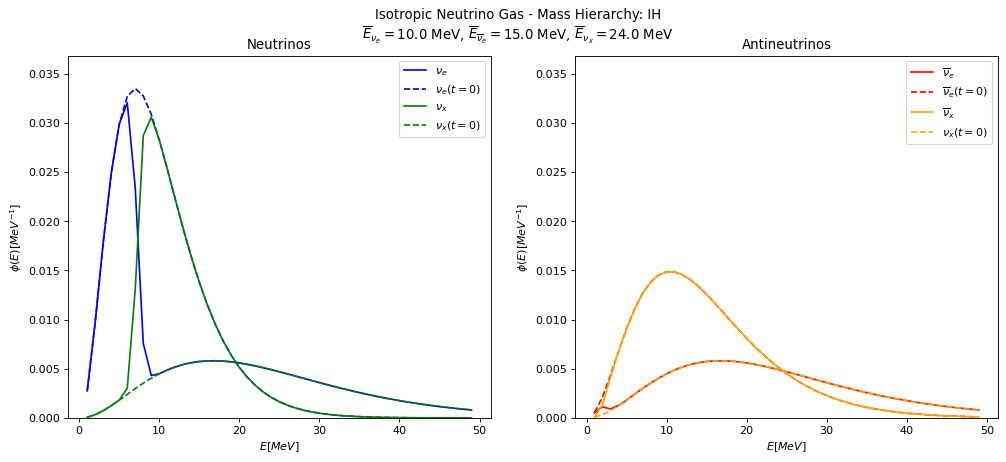

In [7]:
Plot_Spectrum(E_vec,E_0,nu_e_time,nubar_e_time, nu_x_time,nubar_x_time,"IH")

### Bulb Plot

In [8]:
def neutrinosphere(R_nu):
    N = 400
    t = np.linspace(0, 2 * np.pi, N)
    x, y = R_nu * np.cos(t), R_nu * np.sin(t)
    return x,y

#def trajectory(R_nu):
    

<function matplotlib.pyplot.show(close=None, block=None)>

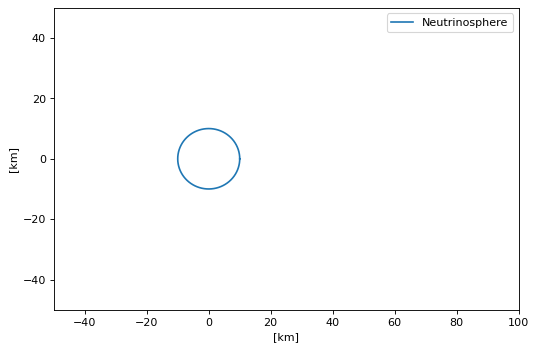

In [18]:
fig= plt.figure(figsize=(15/2, 10/2), dpi= 80, facecolor='w', edgecolor='k')

x,y=neutrinosphere(10)
plt.plot(x,y,label="Neutrinosphere")
plt.xlabel("[km]")
plt.xlim(-50,100)
plt.ylabel("[km]")
plt.ylim(-50,50)
plt.legend()
plt.show

### Potential Plots

In [31]:
y0,omega,E_vec,t_vec,mu_0,n_f,n_dim,n_E=initiate(nu_types,r_i,r_f,E_i,E_f,E_step,E_0,Lum)
len(t_vec)
r_vec=t_vec/from_eV_to_1_over_km
print(r_vec[0],", ",r_vec[-1],"km")

#mu_0 - v1
omega=delta_m2_31/(2*E_vec*10**6)
mu_01=(10)*max(omega)
print(mu_01,"eV")

#mu_0 - v2
Flux=(Lum*(10**51)*erg_to_MeV /E_0)/(4*np.pi*((R_nu*10**5)**2)) # [cm⁻².s⁻¹]
Flux=Flux/(2.998*10**10) #[cm⁻³] (c=1)
Flux=Flux*from_1_over_cm3_to_eV3 #[eV³]
mu_02=np.sqrt(2)*G_F*sum(Flux) #[eV]
print(mu_02,"eV")

10.0 ,  199.99320875190145 km
1.25e-08 eV
5.247148129197688e-05 eV


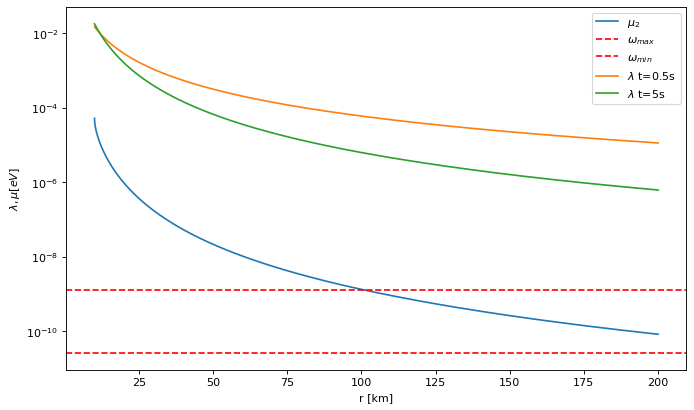

In [33]:
fig= plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')
#mu
#plt.plot(r_vec,mu_supernova_vec(r_vec,mu_01),label=r"$\mu_1$")
plt.plot(r_vec,mu_02*D_geom(r_vec,R_nu),label=r"$\mu_2$")
#Omega
plt.axhline(y=max(omega), color='r', linestyle='--',label=r"$\omega_{max}$")
plt.axhline(y=min(omega), color='r', linestyle='--',label=r"$\omega_{min}$")
#Lambda
plt.plot(r_vec,lambda_supernova(r_vec,"SN",t=0.5),label=r"$\lambda$ t=0.5s")
plt.plot(r_vec,lambda_supernova(r_vec,"SN",t=5),label=r"$\lambda$ t=5s")
plt.yscale('log')
plt.ylabel(r"$\lambda, \mu [eV]$")
plt.xlabel('r [km]')
#plt.xscale('log')
plt.legend()
plt.show()

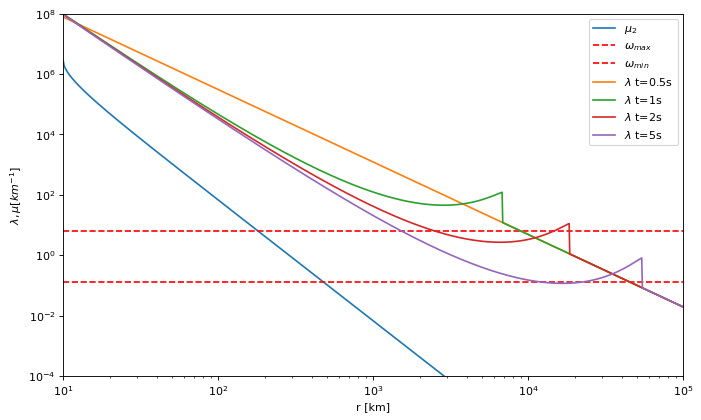

In [35]:
fig= plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')
r_vec=r=np.logspace(1, 5, 1000)
#mu
#plt.plot(r_vec,from_eV_to_1_over_km*mu_supernova_vec(r_vec,mu_01),label=r"$\mu_1$")
plt.plot(r_vec,from_eV_to_1_over_km*10*mu_02*D_geom(r_vec,R_nu),label=r"$\mu_2$")
#Omega
plt.axhline(y=from_eV_to_1_over_km*max(omega), color='r', linestyle='--',label=r"$\omega_{max}$")
plt.axhline(y=from_eV_to_1_over_km*min(omega), color='r', linestyle='--',label=r"$\omega_{min}$")
#Lambda
plt.plot(r_vec,from_eV_to_1_over_km*lambda_supernova(r_vec,"SN",t=0.5),label=r"$\lambda$ t=0.5s")
plt.plot(r_vec,from_eV_to_1_over_km*lambda_supernova(r_vec,"SN",t=1),label=r"$\lambda$ t=1s")
plt.plot(r_vec,from_eV_to_1_over_km*lambda_supernova(r_vec,"SN",t=2),label=r"$\lambda$ t=2s")
plt.plot(r_vec,from_eV_to_1_over_km*lambda_supernova(r_vec,"SN",t=5),label=r"$\lambda$ t=5s")
plt.yscale('log')
plt.ylabel(r"$\lambda, \mu [km^{-1}]$")
plt.xlabel('r [km]')
plt.xscale('log')
plt.ylim(10**-4,10**8)
plt.xlim(10,10**5)
plt.legend()
plt.show()

# Isotropic

In [ ]:
from ODE_Isotropic_Spectrum import *

In [21]:
nu_types=['nu_e','nu_x']
t_bins=1000
E_i,E_f=1,50
E_step=0.05

#Initial spectrum
E_0=[10,15,24,24] #Mean energy in MeV
Amplitude=[1,1*10/15,1*10/24,1*10/24]
#Amplitude=[0.85,0.75,1,1]

## Version 2

In [22]:
y0,omega,E_vec,t_vec,mu_0,n_f,n_dim,n_E=initiate_v2(nu_types,t_bins,E_i,E_f,E_step,E_0,Amplitude)

In [23]:
params=-1*np.array(omega),mu_0,n_f,n_dim,n_E
start_time = time.time()
psoln,infodict= odeint(func_Collective_nu_v2, y0, t_vec, args=(params,),full_output = 1)
print("Took= %s minutes" % ((time.time() - start_time)/60))

Took= 2.18370893796285 minutes


In [24]:
def read_output_v2(psoln,params):
  n_f,n_dim,n_E= params
  num_diff_nu_compnents=2*n_dim
    
  nu,nubar=[],[]
  Pee_nu,Pee_nubar=[],[]
    
  for l in range(n_dim):
    nu.append([])
    nubar.append([])
    for j in range(len(psoln)):
        nu[l].append([])
        nubar[l].append([])
        for i in range(n_E):
          nu[l][j].append(psoln[j][(i*num_diff_nu_compnents)+(l)])
          nubar[l][j].append(psoln[j][(i*num_diff_nu_compnents)+(l+n_dim)])
    
    
  for j in range(len(psoln)):
        Pee_nu.append([])
        Pee_nubar.append([])
        for i in range(n_E):  
          #nu
          Pee_aux=(1/2)*(1+ nu[2][j][i]/nu[2][0][i])
          Pee_nu[j].append(Pee_aux)
          #nubar
          Pee_aux=(1/2)*(1+ nubar[2][j][i]/nubar[2][0][i])
          Pee_nubar[j].append(Pee_aux)
            
  return nu,nubar,Pee_nu,Pee_nubar #[Pauli Matrix][time][energy]

In [25]:
nu,nubar,Pee_nu,Pee_nubar = read_output_v2(psoln,(n_f,n_dim,n_E))

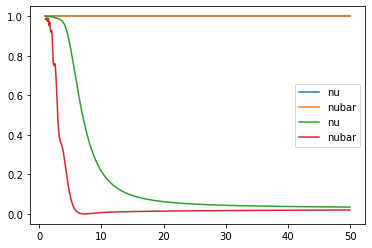

In [26]:
plt.plot(E_vec,Pee_nu[0],label="nu")
plt.plot(E_vec,Pee_nubar[0],label="nubar")
plt.plot(E_vec,Pee_nu[-1],label="nu")
plt.plot(E_vec,Pee_nubar[-1],label="nubar")
plt.legend()
plt.show()

In [27]:
nu_e_time,nubar_e_time, nu_x_time,nubar_x_time=[],[],[],[]

nu_e0=Amplitude[0]*phi_vec(E_vec,E_0[0],2.3)
nubar_e0=Amplitude[1]*phi_vec(E_vec,E_0[1],2.3)
nu_x0=Amplitude[2]*phi_vec(E_vec,E_0[2],2.3)
nubar_x0=Amplitude[3]*phi_vec(E_vec,E_0[3],2.3)

In [28]:
for i in range(len(Pee_nu)):
        nu_e_time.append([])
        nu_x_time.append([])
        nubar_e_time.append([])
        nubar_x_time.append([])
        for j in range(len(Pee_nu[0])):
            Pee_aux=Pee_nu[i][j]
            nu_e_time[i].append(Pee_aux*nu_e0[j]+(1-Pee_aux)*nu_x0[j])
            nu_x_time[i].append(Pee_aux*nu_x0[j]+(1-Pee_aux)*nu_e0[j])
                        
            Pee_aux=Pee_nubar[i][j]
            nubar_e_time[i].append(Pee_aux*nubar_e0[j]+(1-Pee_aux)*nubar_x0[j])
            nubar_x_time[i].append(Pee_aux*nubar_x0[j]+(1-Pee_aux)*nubar_e0[j])

Text(0.5, 0.98, 'Isotropic Neutrino Gas - Mass Hierarchy: IH\n$\\overline{E}_{\\nu_e}= 10.0$ MeV, $\\overline{E}_{\\overline{\\nu}_e}= 15.0$ MeV, $\\overline{E}_{\\nu_x}= 24.0$ MeV')

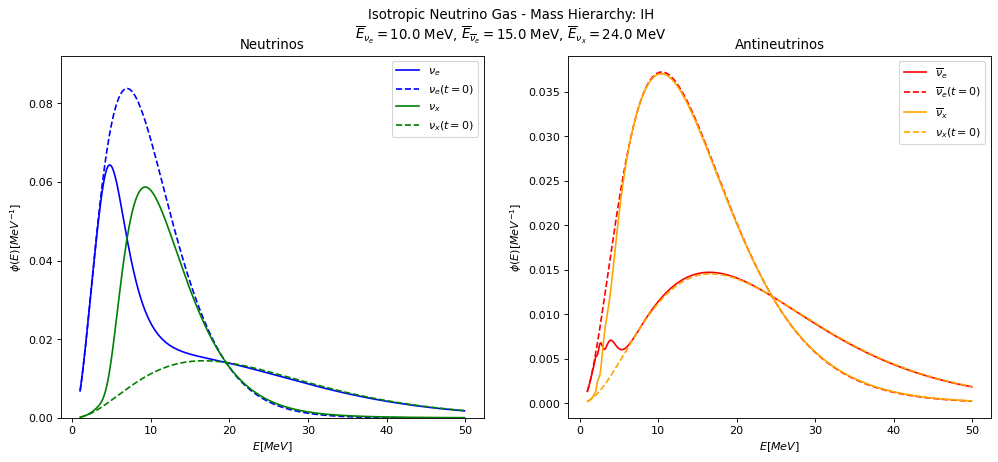

In [20]:
fig= plt.figure(figsize=(15, 6), dpi= 80, facecolor='w', edgecolor='k')
    
ax1=fig.add_subplot(1,2,1)
#nu_e
ax1.plot(E_vec, nu_e_time[-1],color='b',label=r'$\nu_e$')
ax1.plot(E_vec, nu_e_time[0],color='b', linestyle="--",label=r'$\nu_e(t=0)$')#Initial
#nu_x
ax1.plot(E_vec,nu_x_time[-1],color='g',label=r'$\nu_x$')
ax1.plot(E_vec, nu_x_time[0],color='g', linestyle="--",label=r'$\nu_x(t=0)$')#Initial
#Text
ax1.set_title("Neutrinos")
ax1.set_xlabel(r'$E [MeV]$')
ax1.set_ylabel(r'$\phi(E) [MeV^{-1}]$')
ax1.legend(loc='upper right')
ax1.set_ylim(0,1.1*max(nu_e_time[0]))
    
ax2=fig.add_subplot(1,2,2)
#nubar_e
ax2.plot(E_vec,nubar_e_time[-1],color='r',label=r'$\overline{\nu}_e$')
ax2.plot(E_vec, nubar_e_time[0],color='r', linestyle="--",label=r'$\overline{\nu}_e(t=0)$')#Initial
#nubar_x
ax2.plot(E_vec,nubar_x_time[-1],color='orange',label=r'$\overline{\nu}_x$')
ax2.plot(E_vec,nubar_x_time[0],color='orange', linestyle="--",label=r'$\nu_x(t=0)$')#Initial
#Text
ax2.set_title("Antineutrinos")
ax2.set_xlabel(r'$E [MeV]$')
ax2.set_ylabel(r'$\phi(E) [MeV^{-1}]$')
ax2.legend(loc='upper right')
#ax2.set_ylim(0,1.1*max(nu_e_time[0]))
    
fig.suptitle((r'Isotropic Neutrino Gas - Mass Hierarchy: IH')+"\n"+
                 (r"$\overline{E}_{\nu_e}= %.1f$ MeV, $\overline{E}_{\overline{\nu}_e}= %.1f$ MeV, $\overline{E}_{\nu_x}= %.1f$ MeV"%(E_0[0],E_0[1],E_0[2])))
#fig.savefig("Figures/Isotrpic_Gas_Spectrum_%s.png"%title)

## Version 1

In [ ]:
mass_ord="IH"
start_time = time.time()
E_vec,t_vec,nu_e_time_IH,nubar_e_time_IH, nu_x_time_IH,nubar_x_time_IH,nu_IH,nubar_IH=solver_two_families(nu_types,t_bins,E_i,E_f,E_step,E_0,Amplitude,mass_ord)
print("Took %s minutes" % ((time.time() - start_time)/60))

#### Sum $f_s(E)$ and Difference $f_d(E)$ Spectra

In [33]:
f_s_nu=[]
f_d_nu=[]
f_s_nubar=[]
f_d_nubar=[]

for i in range(len(nu_e_time_IH)):
    f_s_nu.append([])
    f_d_nu.append([])
    f_s_nubar.append([])
    f_d_nubar.append([])
    for j in range(len(nu_e_time_IH[0])):
        #nu
        aux=nu_e_time_IH[i][j]+nu_x_time_IH[i][j]
        f_s_nu[i].append(aux)
        aux=nu_e_time_IH[i][j]-nu_x_time_IH[i][j]
        f_d_nu[i].append(aux)
        #nubar
        aux=nubar_e_time_IH[i][j]+nubar_x_time_IH[i][j]
        f_s_nubar[i].append(aux)
        aux=nubar_e_time_IH[i][j]-nubar_x_time_IH[i][j]
        f_d_nubar[i].append(aux)

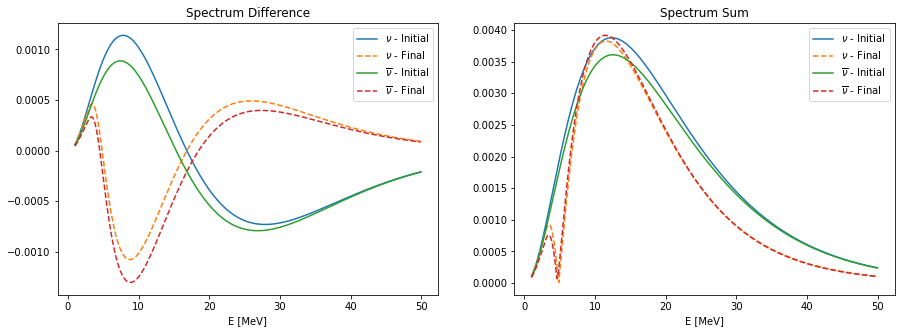

In [34]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(E_vec,f_d_nu[0],label=r"$\nu$ - Initial")
plt.plot(E_vec,f_d_nu[-1],ls='--',label=r"$\nu$ - Final")
plt.plot(E_vec,f_d_nubar[0],label=r"$\overline{\nu}$ - Initial")
plt.plot(E_vec,f_d_nubar[-1],ls='--',label=r"$\overline{\nu}$ - Final")
plt.xlabel("E [MeV]")
plt.title("Spectrum Difference")
plt.legend()
plt.subplot(122)
plt.plot(E_vec,f_s_nu[0],label=r"$\nu$ - Initial")
plt.plot(E_vec,f_s_nu[-1],ls='--',label=r"$\nu$ - Final")
plt.plot(E_vec,f_s_nubar[0],label=r"$\overline{\nu}$ - Initial")
plt.plot(E_vec,f_s_nubar[-1],ls='--',label=r"$\overline{\nu}$ - Final")
plt.xlabel("E [MeV]")
plt.title("Spectrum Sum")
plt.legend()
plt.show()

In [36]:
print("Initial Total lepton number",sum(f_s_nu[0])-sum(f_s_nubar[0]))
print("Final Total lepton number",sum(f_s_nu[-1])-sum(f_s_nubar[-1]))

Initial Total lepton number 0.09974870461395557
Final Total lepton number -0.018670159072334602


#### Sum $\vec S$ and Difference $\vec D$ Vectors

In [3]:
S_w=[]
S=[]
D_w=[]
D=[]

for i in range(len(nu_IH)):
    S.append([])
    S_w.append([])
    D.append([])
    D_w.append([])
    for k in range(len(nu_IH[0][0])):
        aux=(np.array(nu_IH[i][0][k])+np.array(nu_IH[i][1][k]))+(np.array(nubar_IH[i][0][k])+np.array(nubar_IH[i][1][k]))
        S[i].append(sum(aux))
        S_w[i].append(aux)
        aux=(np.array(nu_IH[i][0][k])+np.array(nu_IH[i][1][k]))-(np.array(nubar_IH[i][0][k])+np.array(nubar_IH[i][1][k]))
        D[i].append(sum(aux))
        D_w[i].append(aux)    

In [35]:
S=np.array(S)

In [38]:
S[0][1:-1]/S[0][1:-1]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

/home/pedro/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py:973: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  warnings.warn(


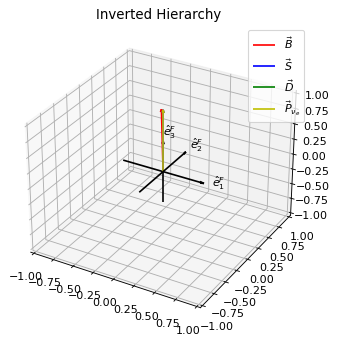

In [45]:
t_f=t_bins
E_i=int(len(E_vec)/2)

fig = plt.figure(figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(1,1,1,projection='3d')

#B
B1,B2,B3=B_vec(3)
quiver_B = ax1.quiver(0, 0, 0, B1, B2, B3, arrow_length_ratio=0.05,color='r',normalize=True,label=r'$\vec{B}$')

#Sum
S1,S2,S3= S[0][0],S[1][0],S[2][0]
quiver_S = ax1.quiver(0, 0, 0,S1,S2,S3, arrow_length_ratio=0.05,normalize=True,color='b',label=r'$\vec{S}$')
#ax1.plot(S[0][::],S[1][::],S[2][::],c='b')

#Diff
D1,D2,D3= D[0][0],D[1][0],D[2][0]
quiver_D = ax1.quiver(0, 0, 0,D1,D2,D3, arrow_length_ratio=0.05,normalize=True,color='g',label=r'$\vec{D}$')

#Pe
P1,P2,P3= nu_IH[0][0][0][E_i],nu_IH[1][0][0][E_i],nu_IH[2][0][0][E_i]
quiver_P = ax1.quiver(0, 0, 0,P1,P2,P3, arrow_length_ratio=0.05,normalize=True,color='y',label=r'$\vec{P}_{\nu_e}$')

ax1.set_xlim(-1, 1)
ax1.set_ylim(-1, 1)
ax1.set_zlim(-1, 1)
ax1.quiver(-0.5, 0, 0, 1, 0, 0, arrow_length_ratio=0.05,color='k')
ax1.text(0.6,0,0, r"$\hat{e}^F_1$", color='k')
ax1.quiver(0, -0.5, 0, 0, 1, 0, arrow_length_ratio=0.05,color='k')
ax1.text(0,0.6,0, r"$\hat{e}^F_2$", color='k')
ax1.quiver(0, 0, -0.5, 0, 0, 1, arrow_length_ratio=0.05,color='k')
ax1.text(0,0,0.6, r"$\hat{e}^F_3$", color='k')
ax1.set_title(r'Inverted Hierarchy')
ax1.legend()




def update(t_i):
    #Sum
    global quiver_S
    quiver_S.remove()
    S1,S2,S3= S[0][t_i],S[1][t_i],S[2][t_i]
    quiver_S = ax1.quiver(0, 0, 0,S1,S2,S3, arrow_length_ratio=0.05,normalize=True,color='b')
    
    #Diff
    global quiver_D
    quiver_D.remove()
    D1,D2,D3= D[0][t_i],D[1][t_i],D[2][t_i]
    quiver_D = ax1.quiver(0, 0, 0,D1,D2,D3, arrow_length_ratio=0.05,normalize=True,color='g')
    
    #Pe
    global quiver_P
    quiver_P.remove()
    P1,P2,P3= nu_IH[0][0][t_i][E_i],nu_IH[1][0][t_i][E_i],nu_IH[2][0][t_i][E_i]
    quiver_P = ax1.quiver(0, 0, 0,P1,P2,P3, arrow_length_ratio=0.05,normalize=True,color='y')


ani = FuncAnimation(fig, update, frames=np.arange(0,t_f,1), interval=100)

In [46]:
HTML(ani.to_html5_video())

# $\lambda,\mu$ profiles

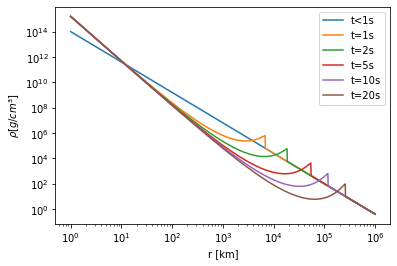

In [2]:
#r=np.arange(0.1,10000,1)
r=np.logspace(0, 6.0, 1000)
plt.plot(r,SN_density_profile(r,0.5),label="t<1s")
plt.plot(r,SN_density_profile(r,1),label="t=1s")
plt.plot(r,SN_density_profile(r,2),label="t=2s")
plt.plot(r,SN_density_profile(r,5),label="t=5s")
plt.plot(r,SN_density_profile(r,10),label="t=10s")
plt.plot(r,SN_density_profile(r,20),label="t=20s")
plt.yscale('log')
plt.ylabel(r"$\rho [g/cm³]$")
plt.xlabel('r [km]')
plt.xscale('log')
plt.legend()
plt.show()

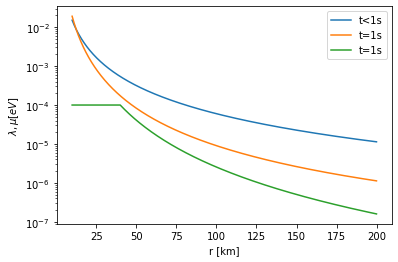

In [20]:
r=np.arange(10,200,0.1)
plt.plot(r,lambda_supernova(r,"SN",t=0.5),label="t<1s")
plt.plot(r,lambda_supernova(r,"SN",t=1),label="t=1s")
#plt.plot(r,lambda_supernova(r,"SN",t=2),label="t=2s")
#plt.plot(r,lambda_supernova(r,"SN",t=5),label="t=5s")
#plt.plot(r,lambda_supernova(r,"SN",t=10),label="t=10s")
#plt.plot(r,lambda_supernova(r,"SN",t=20),label="t=20s")
plt.plot(r,mu_supernova_vec(r,0.0001),label="t=1s")
plt.yscale('log')
plt.ylabel(r"$\lambda, \mu [eV]$")
plt.xlabel('r [km]')
#plt.xscale('log')
plt.legend()
plt.show()

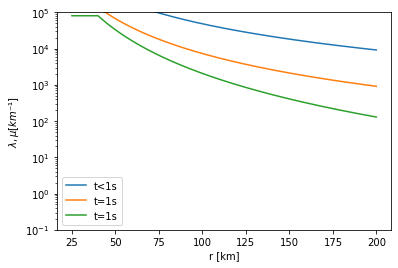

In [23]:
r=np.arange(25,200,0.1)
plt.plot(r,from_eV_to_1_over_km*lambda_supernova(r,"SN",t=0.5),label="t<1s")
plt.plot(r,from_eV_to_1_over_km*lambda_supernova(r,"SN",t=1),label="t=1s")
#plt.plot(r,from_eV_to_1_over_km*lambda_supernova(r,"SN",t=2),label="t=2s")
#plt.plot(r,from_eV_to_1_over_km*lambda_supernova(r,"SN",t=5),label="t=5s")
#plt.plot(r,from_eV_to_1_over_km*lambda_supernova(r,"SN",t=10),label="t=10s")
#plt.plot(r,from_eV_to_1_over_km*lambda_supernova(r,"SN",t=20),label="t=20s")
plt.plot(r,from_eV_to_1_over_km*mu_supernova_vec(r,0.0001),label="t=1s")
plt.yscale('log')
plt.ylabel(r"$\lambda, \mu [km⁻¹]$")
plt.xlabel('r [km]')
#plt.xscale('log')
plt.ylim(0.1,10**5)
plt.legend()
plt.show()